# **Loan Default Prediction (Exploratory Data Analysis)**

## Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ydata_profiling as pp

%matplotlib inline

## Load Data

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

## Profile Report

In [4]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Identify Column Type

In [5]:
category_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']

In [6]:
category_col

['LoanID',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [7]:
numerical_col

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Default']

In [8]:
for col in category_col:
    print(train_df[col].value_counts())
    print('\n')

LoanID
I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: count, Length: 255347, dtype: int64


Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64


HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64


HasDependents
Yes    127742
No     127605
Name: count, dtype: int64


LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64


HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64




In [9]:
for col in numerical_col:
    print(f'For Column {col}:')
    print(train_df[col].describe())
    print('\n')

For Column Age:
count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64


For Column Income:
count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64


For Column LoanAmount:
count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64


For Column CreditScore:
count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64


For Column MonthsEmployed:
count    255347.000000
me

## Visualization

#### **A. Univariate Analysis**

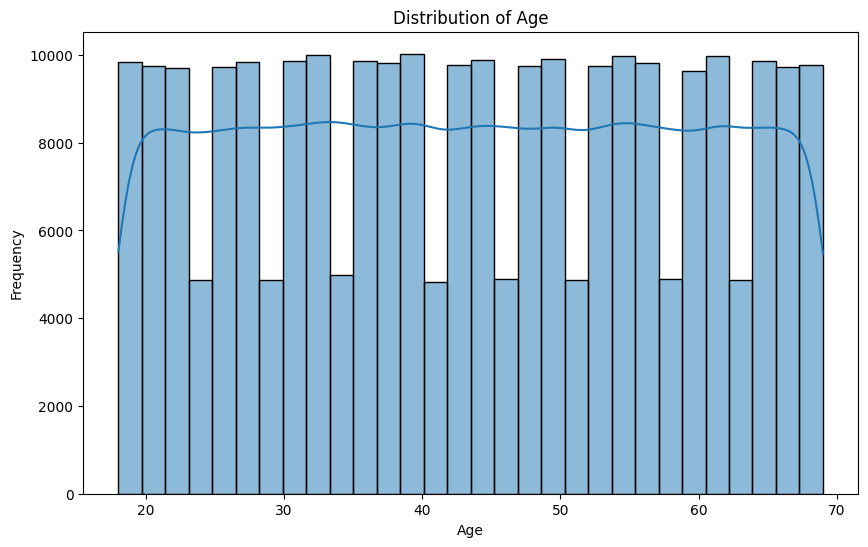

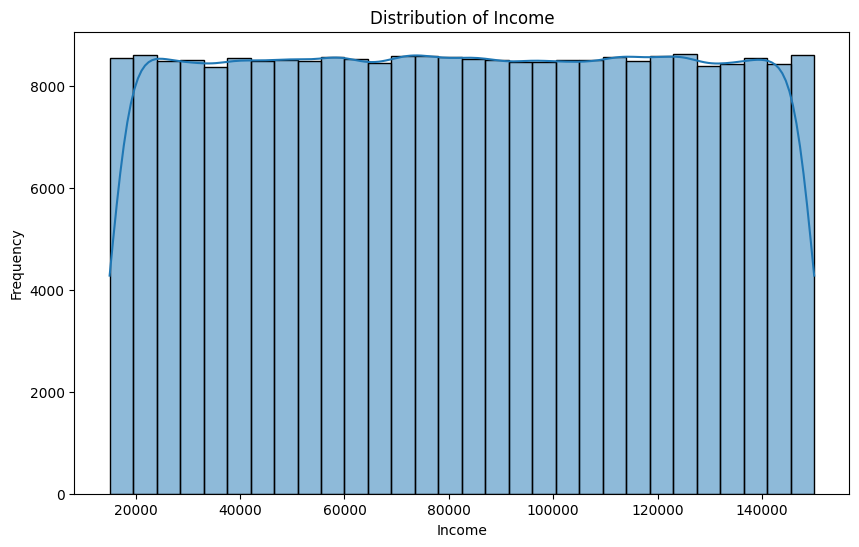

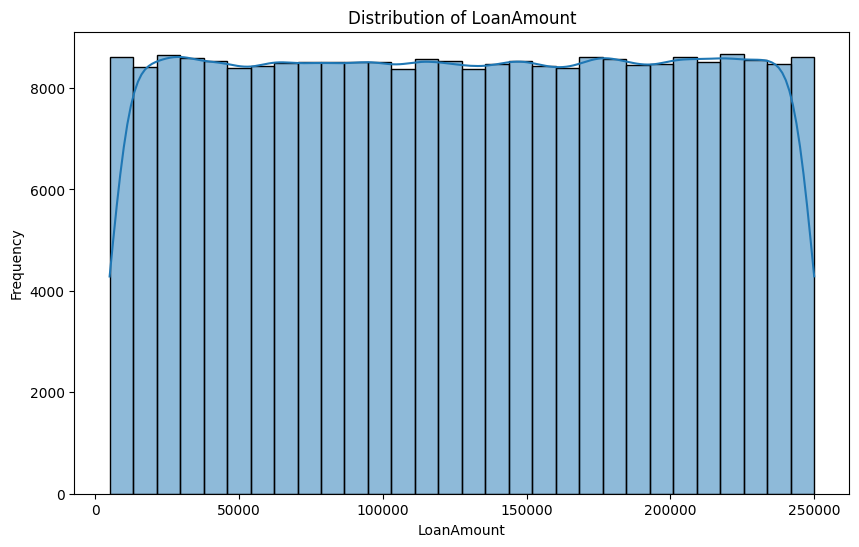

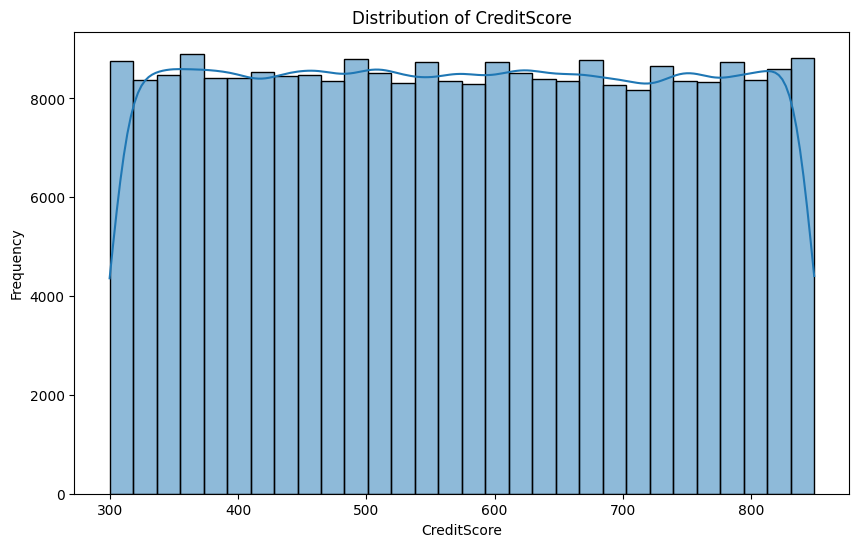

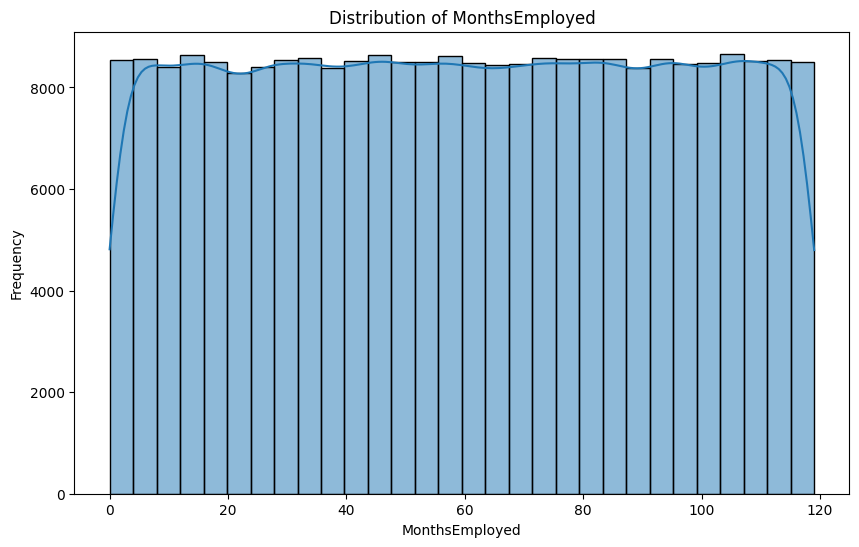

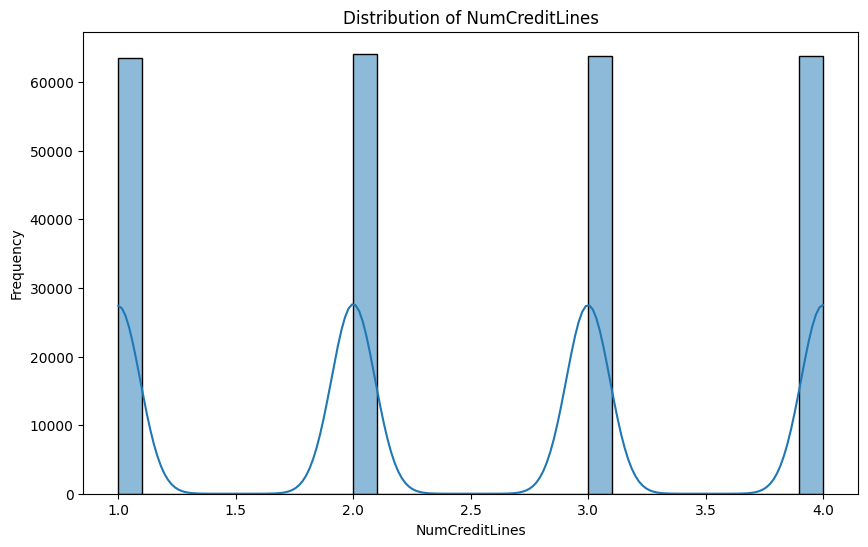

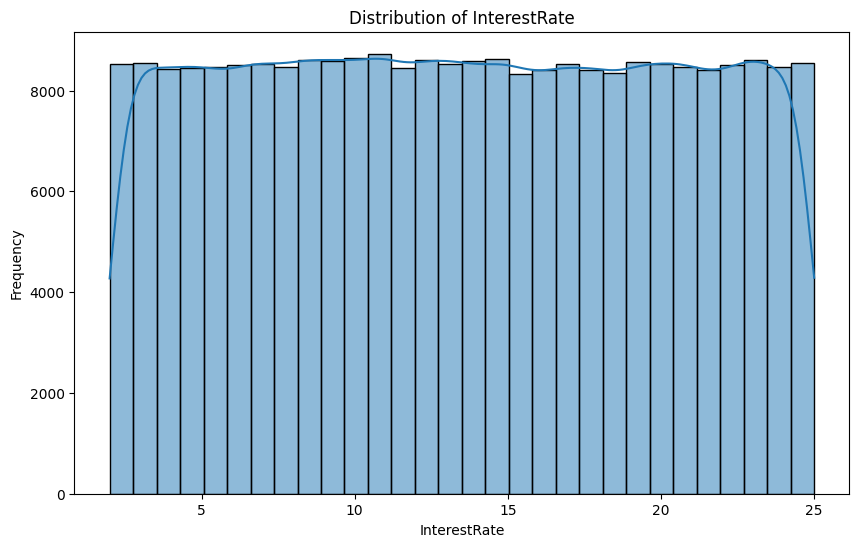

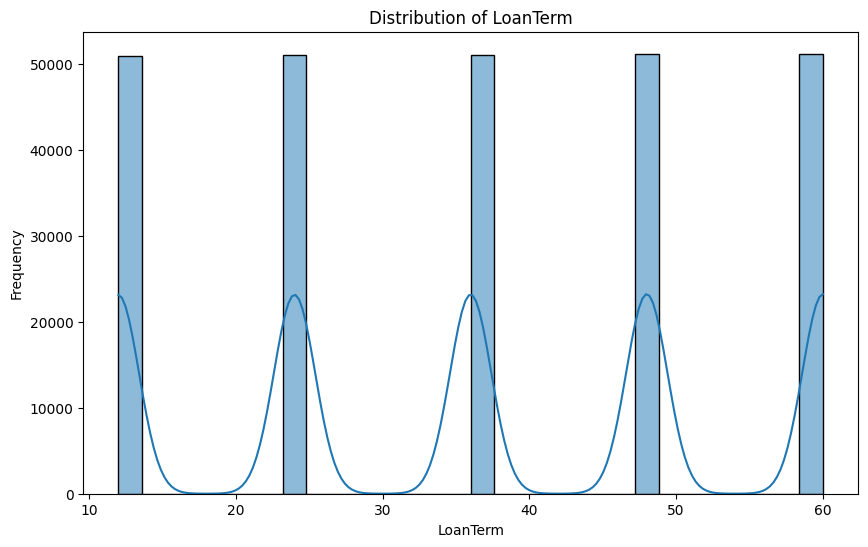

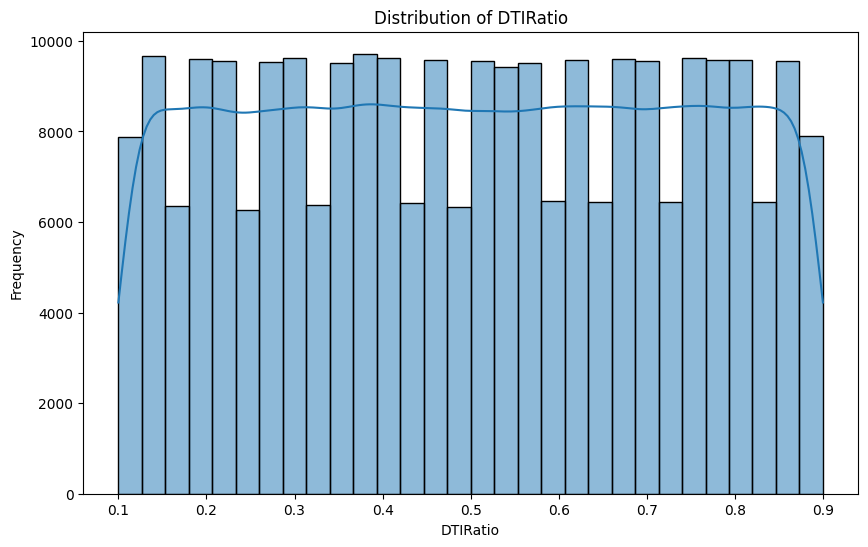

In [10]:
for col in numerical_col:
    if col != 'Default':
        plt.figure(figsize=(10, 6))
        sns.histplot(train_df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

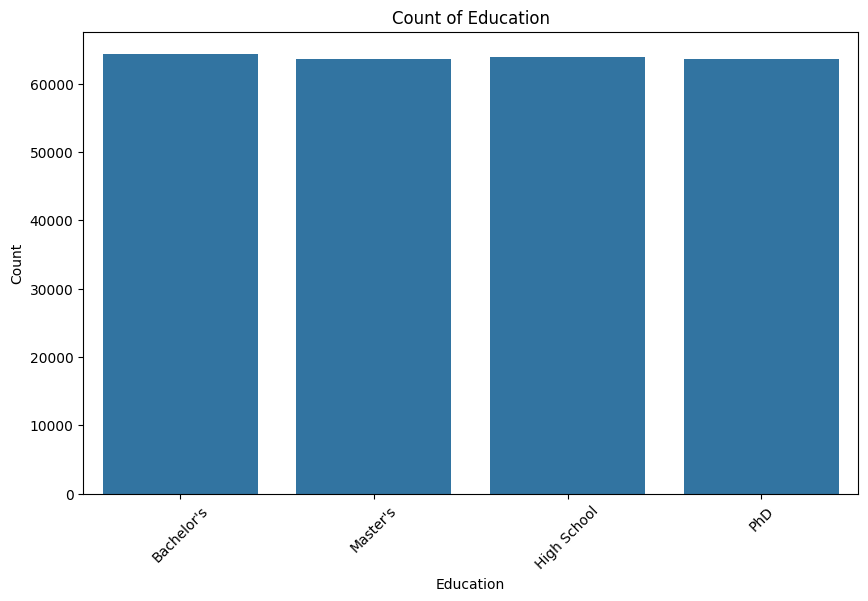

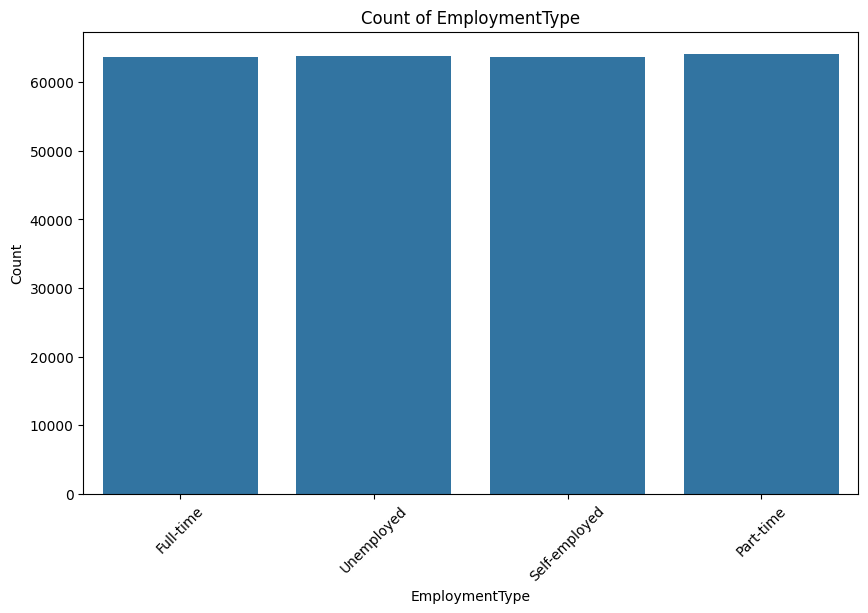

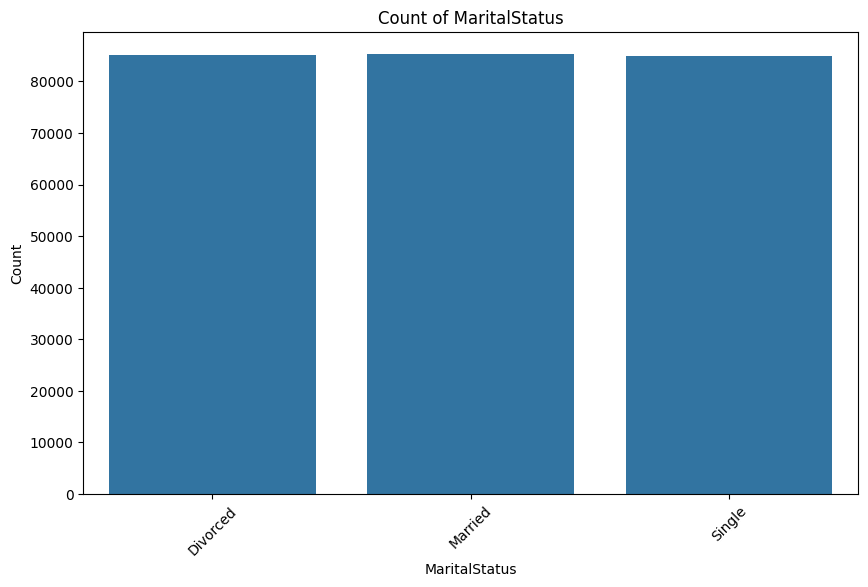

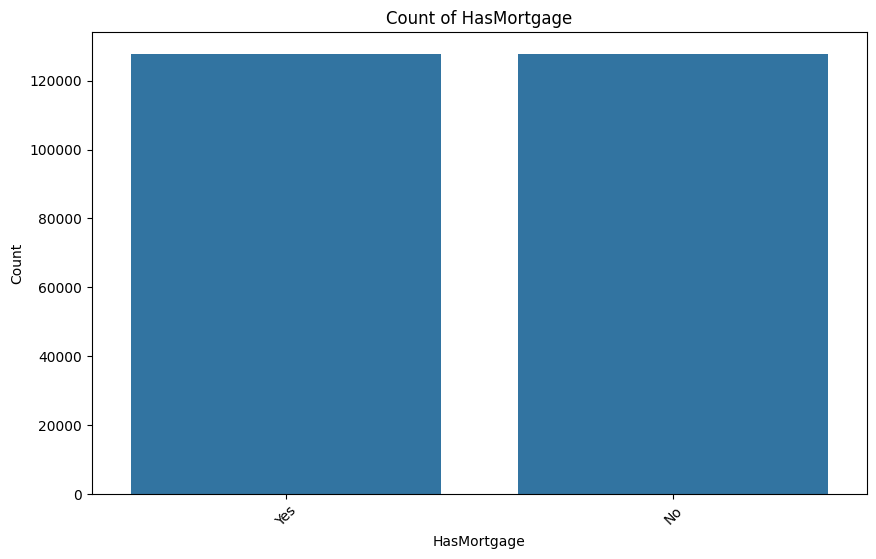

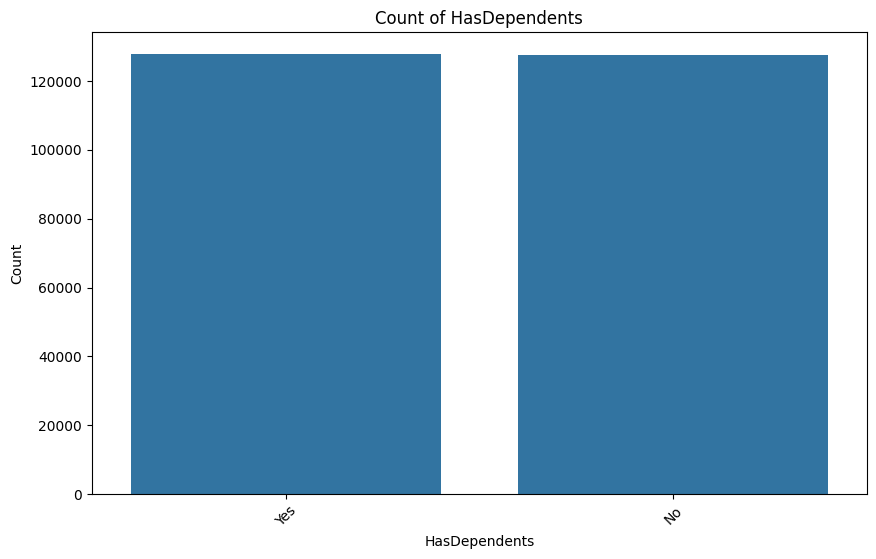

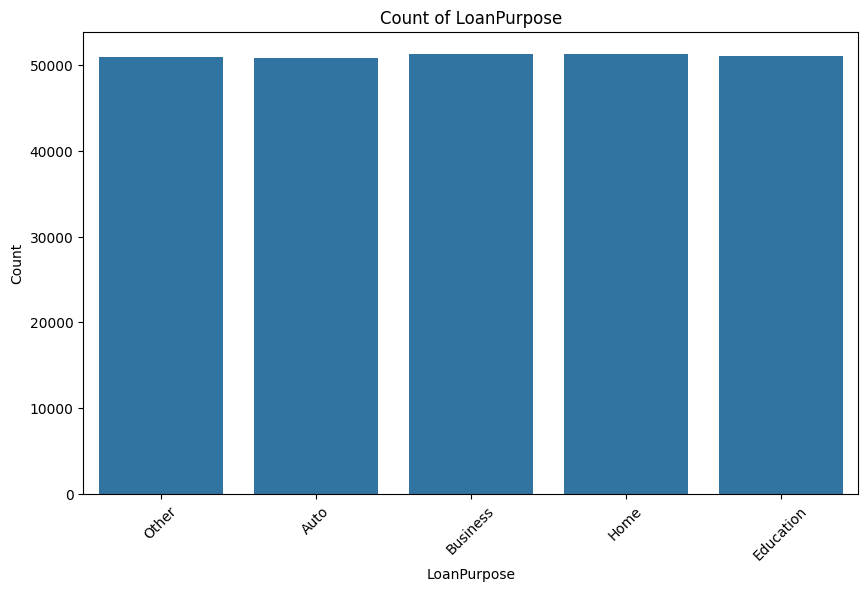

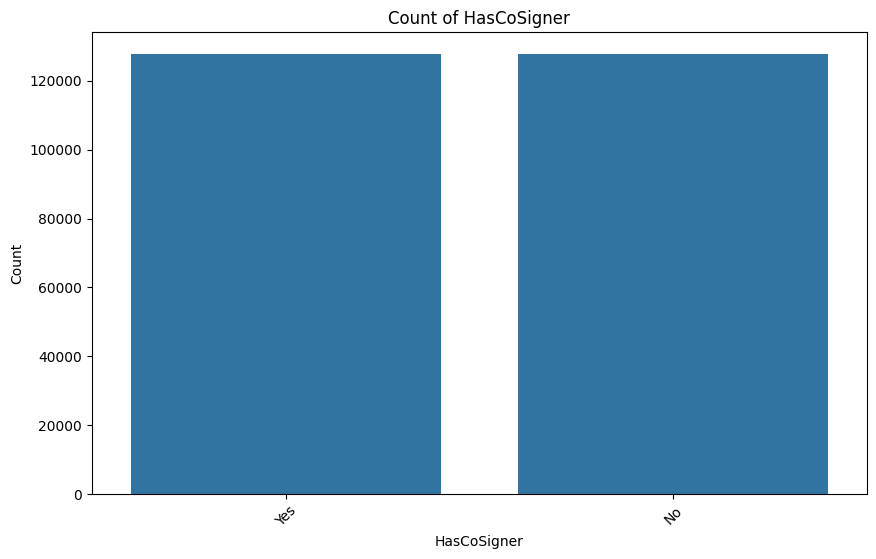

In [11]:
for col in category_col:
    if col != 'LoanID':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=train_df, x=col)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.show()

#### **B. Bivariate Analysis**

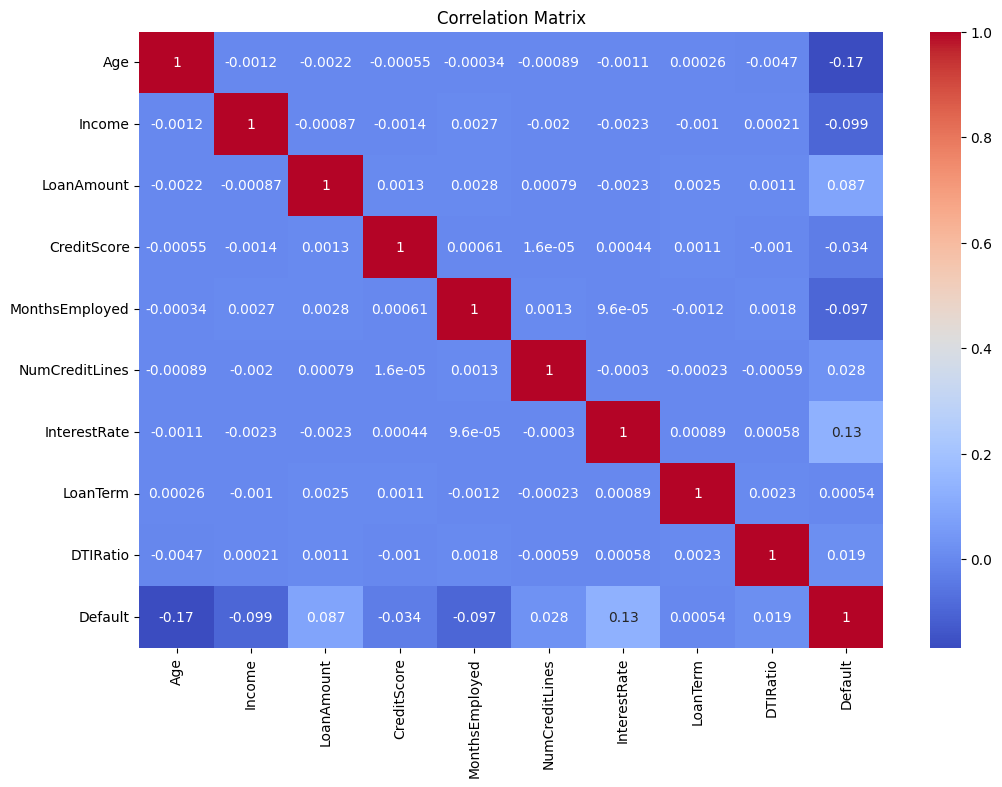

In [12]:
df_numeric_columns = train_df[numerical_col]
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

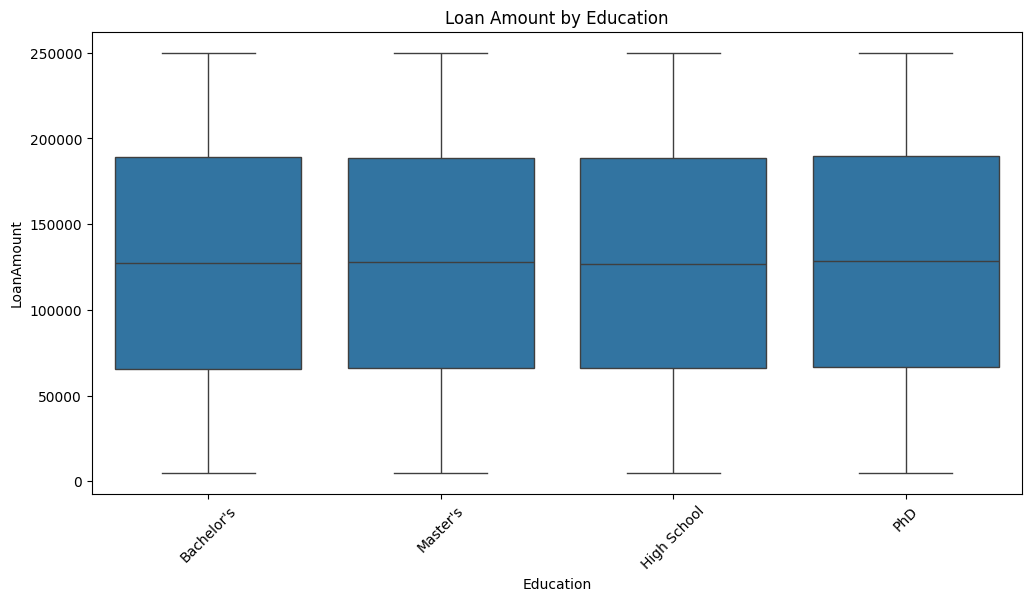

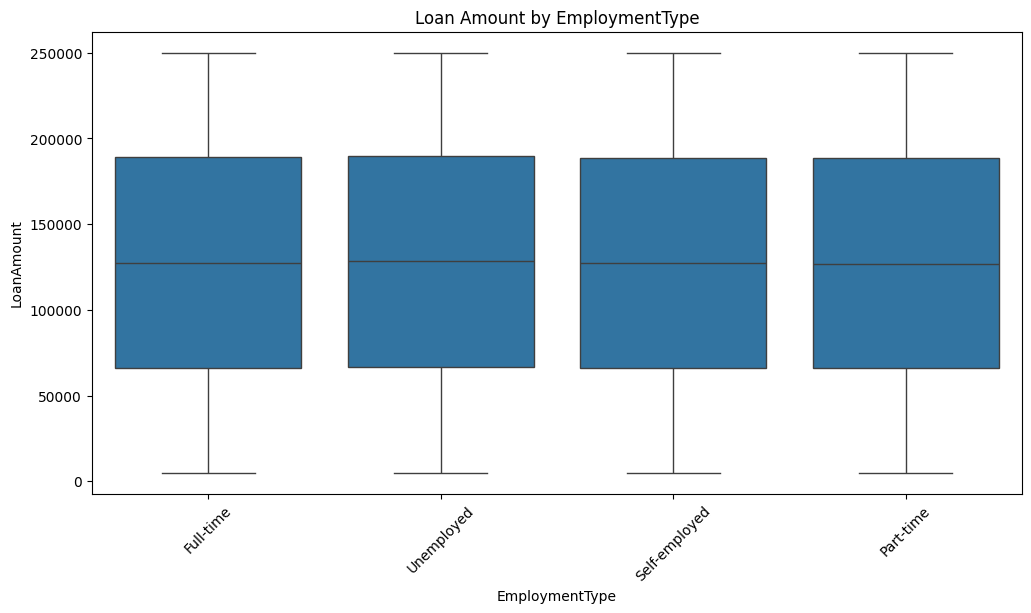

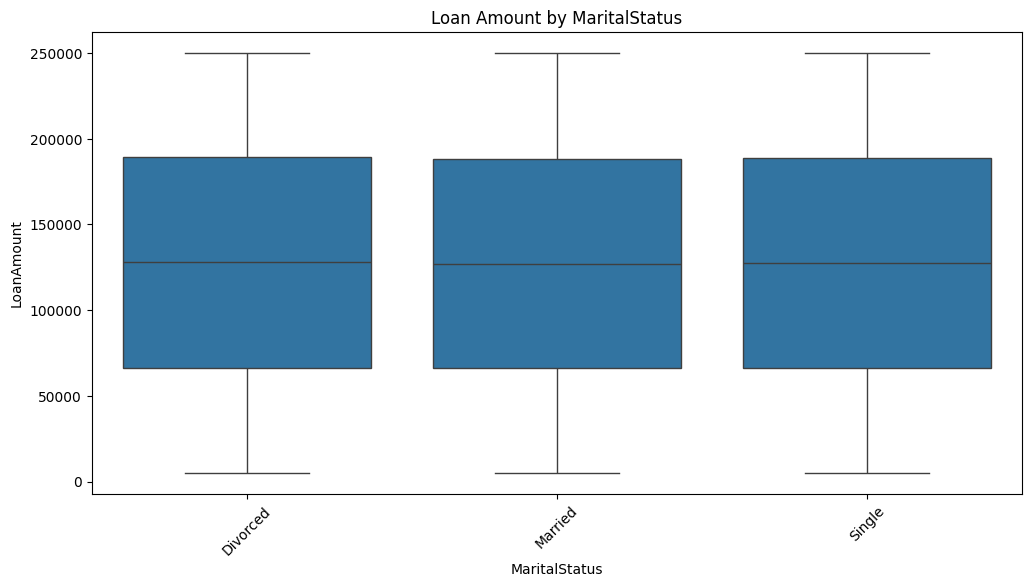

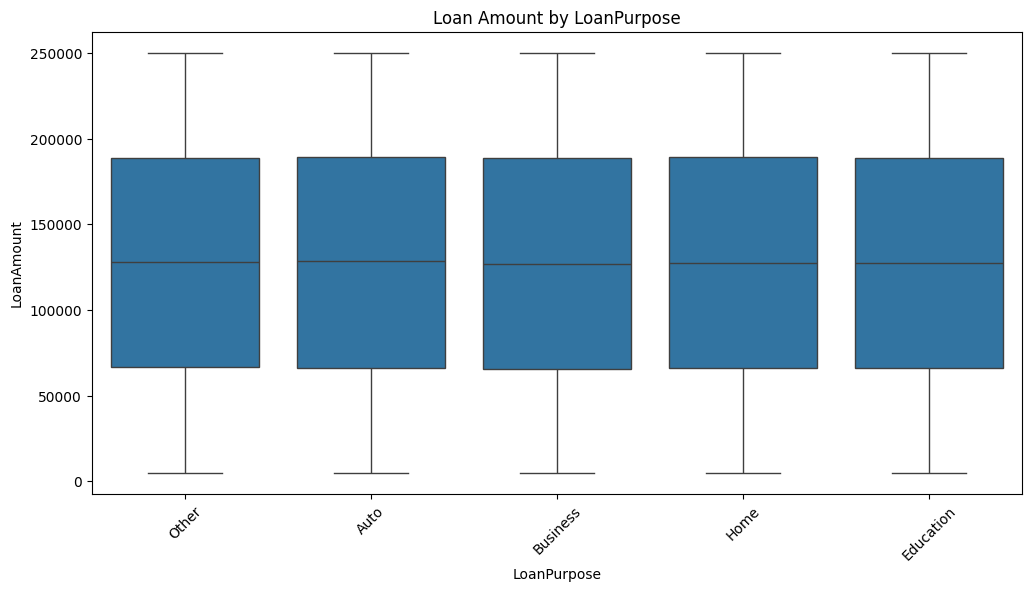

In [13]:
for col in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train_df, x=col, y='LoanAmount')
    plt.title(f'Loan Amount by {col}')
    plt.xticks(rotation=45)
    plt.show()

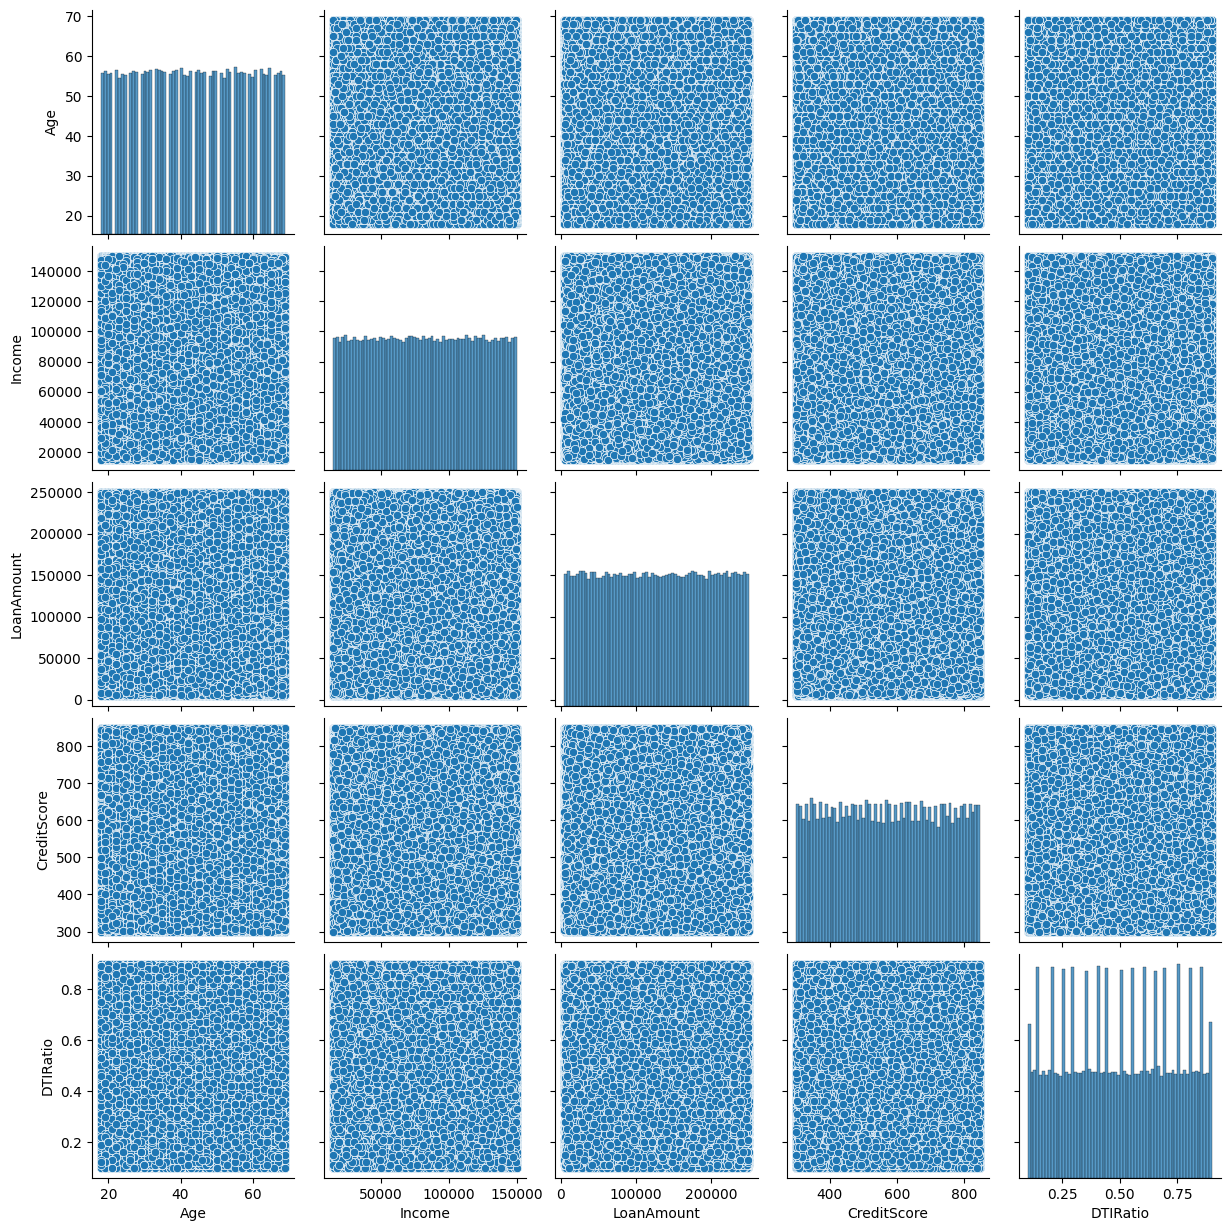

In [14]:
sns.pairplot(train_df, vars=['Age', 'Income', 'LoanAmount', 'CreditScore', 'DTIRatio'])

## Group and Aggregation

In [15]:
group_col = ['Education','EmploymentType','MaritalStatus','LoanPurpose','HasMortgage','HasDependents','HasCoSigner']

train_df.groupby(group_col)['LoanAmount'].mean().reset_index()

Education EmploymentType MaritalStatus LoanPurpose HasMortgage  \
0     Bachelor's      Full-time      Divorced        Auto          No   
1     Bachelor's      Full-time      Divorced        Auto          No   
2     Bachelor's      Full-time      Divorced        Auto          No   
3     Bachelor's      Full-time      Divorced        Auto          No   
4     Bachelor's      Full-time      Divorced        Auto         Yes   
...          ...            ...           ...         ...         ...   
1915         PhD     Unemployed        Single       Other          No   
1916         PhD     Unemployed        Single       Other         Yes   
1917         PhD     Unemployed        Single       Other         Yes   
1918         PhD     Unemployed        Single       Other         Yes   
1919         PhD     Unemployed        Single       Other         Yes   

     HasDependents HasCoSigner     LoanAmount  
0               No          No  133263.789474  
1               No         Yes  130102.578231  
2              Yes          No  120791.945946  
3              Yes         Yes  133302.834586  
4               No          No  130041.008475  
...            ...         ...            ...  
1915           Yes         Yes  126056.432836  
1916            No          No  130298.581560  
1917            No         Yes  121824.656000  
1918           Yes          No  129848.208955  
1919           Yes         Yes  122191.551181  

[1920 rows x 8 columns]

In [16]:
for col in group_col:
    print(train_df.groupby(col)['LoanAmount'].mean().reset_index())
    print('\n')

     Education     LoanAmount
0   Bachelor's  127390.632026
1  High School  127393.676823
2     Master's  127710.986450
3          PhD  127823.681178


  EmploymentType     LoanAmount
0      Full-time  127469.866595
1      Part-time  127329.702904
2  Self-employed  127436.700232
3     Unemployed  128079.958182


  MaritalStatus     LoanAmount
0      Divorced  127810.225265
1       Married  127250.951326
2        Single  127676.481403


  LoanPurpose     LoanAmount
0        Auto  127857.908721
1    Business  127141.807458
2   Education  127645.822841
3        Home  127622.382853
4       Other  127629.648054


  HasMortgage     LoanAmount
0          No  127635.602812
1         Yes  127522.131324


  HasDependents     LoanAmount
0            No  127569.000799
1           Yes  127588.719646


  HasCoSigner     LoanAmount
0          No  127709.804827
1         Yes  127447.982592




## Outlier Detection

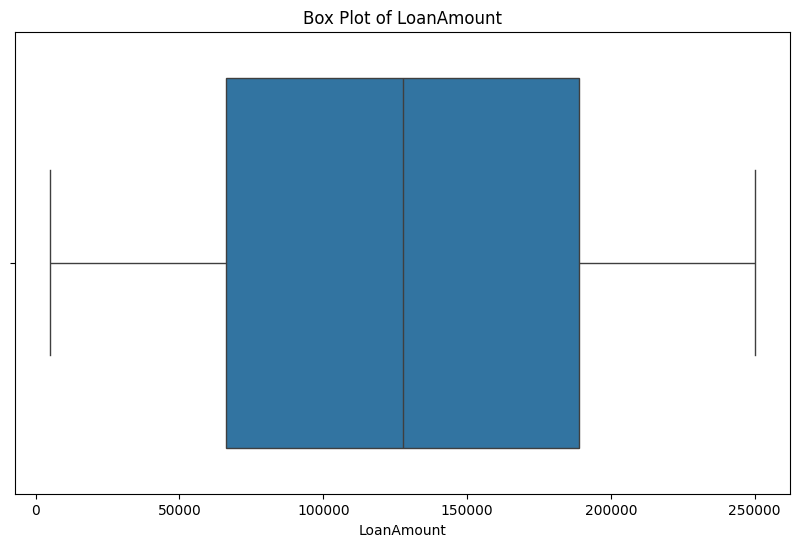

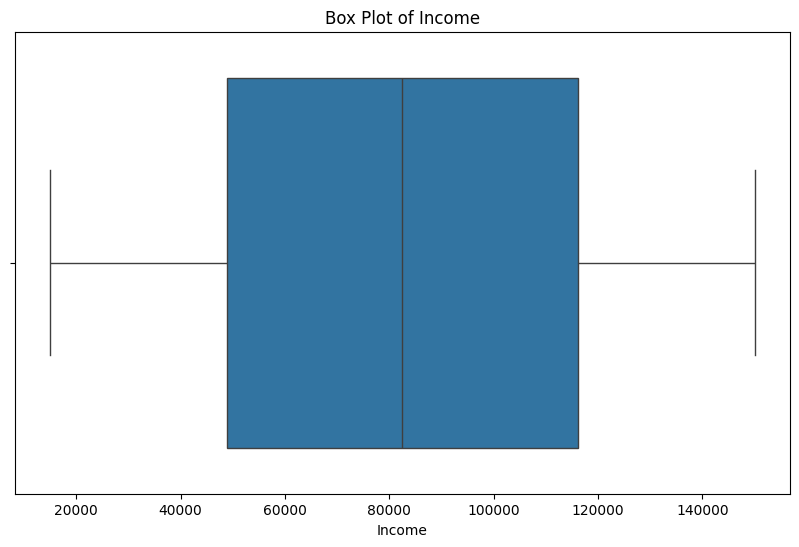

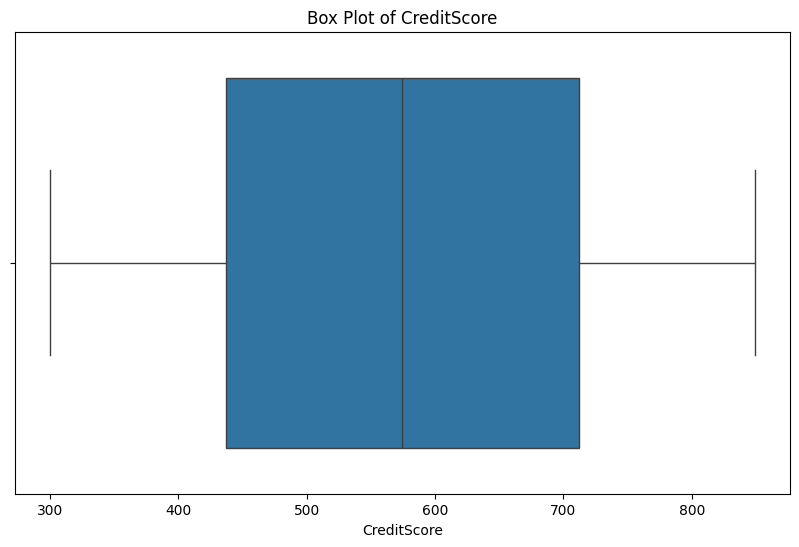

In [17]:
columns_to_analyze = ['LoanAmount', 'Income', 'CreditScore']

for col in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

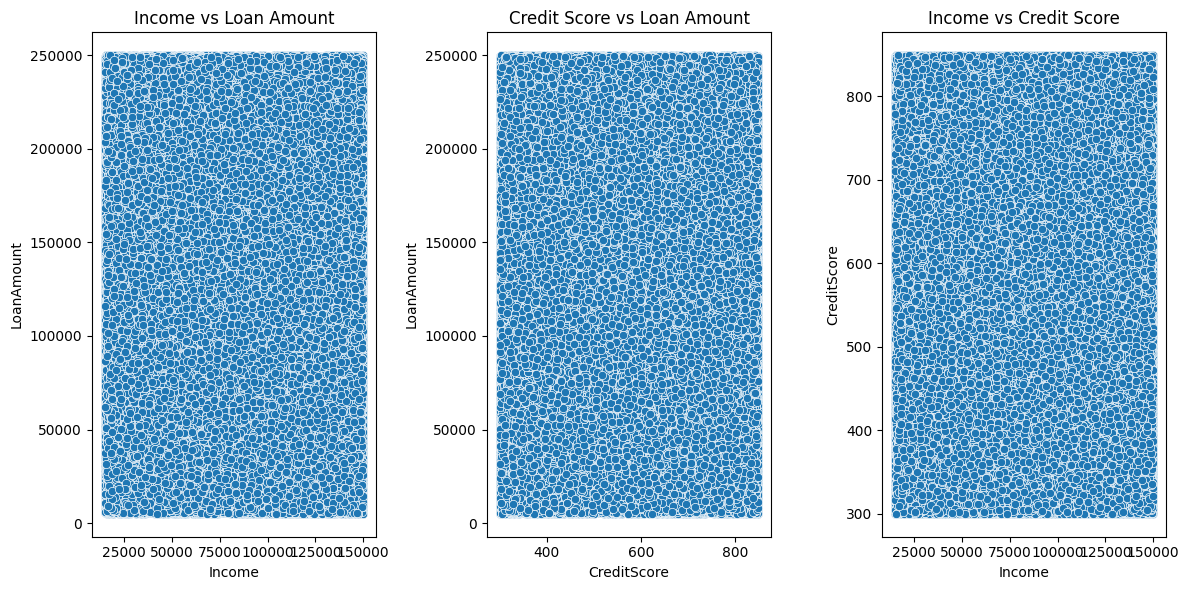

In [18]:
plt.figure(figsize=(12, 6))

# Scatter plot for Income vs Loan Amount
plt.subplot(1, 3, 1)
sns.scatterplot(x='Income', y='LoanAmount', data=train_df)
plt.title('Income vs Loan Amount')

# Scatter plot for Credit Score vs Loan Amount
plt.subplot(1, 3, 2)
sns.scatterplot(x='CreditScore', y='LoanAmount', data=train_df)
plt.title('Credit Score vs Loan Amount')

# Scatter plot for Income vs Credit Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Income', y='CreditScore', data=train_df)
plt.title('Income vs Credit Score')

plt.tight_layout()
plt.show()

## --END OF EDA--